In [5]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

# Stationary Problem

In [65]:
q_star = [0.2 , -0.8 , 1.4 , 2.2 , 1.5 , -1.2 , -2.5 , -1 , 2.7 , -0.5]

In [66]:
def plot_gaussian(x,Reward_distribution): 
    plt.figure(figsize=(15,15))
    plt.subplot(10,1,1)
    plt.grid() 
    plt.plot(x, Reward_distribution[0])
    plt.subplot(10,1,2)
    plt.grid() 
    plt.plot(x, Reward_distribution[1]) 
    plt.subplot(10,1,3)
    plt.grid() 
    plt.plot(x, Reward_distribution[2]) 
    plt.subplot(10,1,4)
    plt.grid() 
    plt.plot(x, Reward_distribution[3]) 
    plt.subplot(10,1,5)
    plt.grid() 
    plt.plot(x, Reward_distribution[4]) 
    plt.subplot(10,1,6)
    plt.grid() 
    plt.plot(x, Reward_distribution[5]) 
    plt.subplot(10,1,7)
    plt.grid() 
    plt.plot(x, Reward_distribution[6])
    plt.subplot(10,1,8)
    plt.grid() 
    plt.plot(x, Reward_distribution[7]) 
    plt.subplot(10,1,9)
    plt.grid() 
    plt.plot(x, Reward_distribution[8])
    plt.subplot(10,1,10)
    plt.grid() 
    plt.plot(x, Reward_distribution[9]) 


def Reward_k(k,q_star,plotting=False):
    x = np.arange(-3, 3, 0.01)
    
    Reward_temp = []
    for i in range(10):
        Reward_temp.append((norm.pdf(x, loc=q_star[i], scale=1)))
        
    Reward_distribution = []
    for i in range(10):
        Reward_distribution.append(np.array(Reward_temp[i])*1/np.sum(Reward_temp[i]))
    
    if plotting == True:
        print(f'Action : {k}')
        plot_gaussian(x,Reward_distribution)
    return np.random.choice(x, p=Reward_distribution[k])

Action : 0


0.13999999999993307

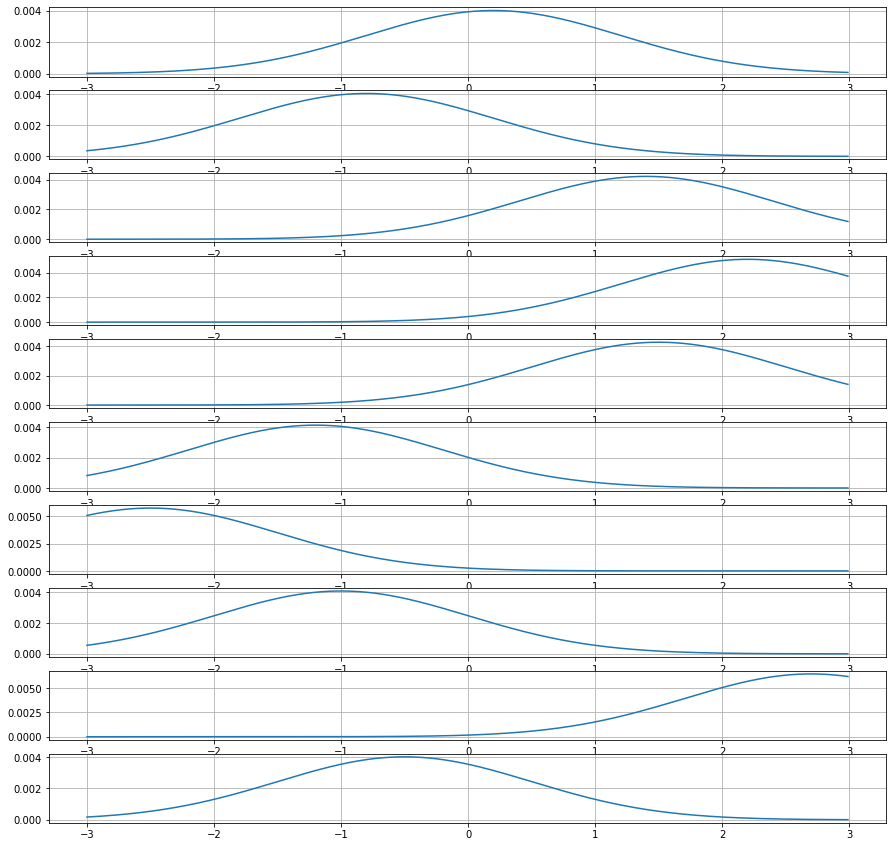

In [67]:
Reward_k(0,q_star,True)

In [68]:
def Q_npus1(qn,rn,alpha):
    return qn + alpha*(rn-qn)

def act_select(qn,epsilon):
    if np.sum(qn)== 0:
        return random.randint(0,9)
    else:
        argmax_num = np.argmax(qn)
        other_num = np.delete(np.arange(0,10,1),argmax_num)
        output_list = [argmax_num ,np.random.choice(other_num)]
        
        return np.random.choice(output_list,p=[1-epsilon,epsilon])
    
def reward_return(action,q_star):
    Reward_list = []
    for i in range(10):
        Reward_list.append(Reward_k(i,q_star))
    return Reward_list[action]

In [69]:
def calculate_Q(epsilon,epoch,alp=True,alpha_value=0.1,q_star=q_star):
    N_action = [0,0,0,0,0,0,0,0,0,0]
    Q_list = []
    Q = np.array(np.zeros(10))
    rn_list= []
    avg_reward_epsilon = []
    time = 0

    for i in range(epoch):
        time+=1
        
        action_selection = act_select(Q,epsilon)
        # print(action_selection)
        N_action[action_selection] +=1
        qn = Q[action_selection]
        rn = reward_return(action_selection,q_star)
        if alp == True:
            alpha = 1/N_action[action_selection]
        else:
            alpha = alpha_value
        rn_list.append(rn) 
        avg_reward_epsilon.append(sum(rn_list)/time)
        Q[action_selection] = Q_npus1(qn,rn,alpha)
        Q_list.append(Q)

    print("N_action : ",N_action)
    print("Q_Value  :",Q)
    
    return avg_reward_epsilon,N_action,Q

In [70]:
avg_reward_epsilon_0 , N_action_0 , Q_0 = calculate_Q(epsilon = 0,epoch = 1000, alp=True , q_star=q_star)

N_action :  [0, 0, 1000, 0, 0, 0, 0, 0, 0, 0]
Q_Value  : [0.      0.      1.32131 0.      0.      0.      0.      0.      0.
 0.     ]


In [71]:
avg_reward_epsilon_0_3 , N_action_0_3 , Q_0_3 = calculate_Q(epsilon = 0.3,epoch = 1000, alp=True, q_star=q_star)

N_action :  [47, 34, 29, 37, 37, 35, 34, 35, 679, 33]
Q_Value  : [ 0.10659574 -0.54176471  1.31724138  1.59459459  1.49783784 -0.85742857
 -2.08558824 -0.72228571  2.10952872 -0.72272727]


In [72]:
avg_reward_epsilon_0_1 , N_action_0_1 , Q_0_1 = calculate_Q(epsilon = 0.1,epoch = 1000, alp=True, q_star=q_star)

N_action :  [12, 11, 47, 879, 12, 8, 7, 5, 6, 13]
Q_Value  : [ 0.42583333 -0.77545455  1.20085106  1.83605233  1.5225     -1.04
 -1.52428571 -1.318       1.40166667 -0.14538462]


In [73]:
avg_reward_epsilon_0_05 , N_action_0_05 , Q_0_05 = calculate_Q(epsilon = 0.05,epoch = 1000, alp=True, q_star=q_star)

N_action :  [6, 3, 9, 6, 27, 4, 5, 4, 929, 7]
Q_Value  : [ 0.9        -1.74666667  1.19444444  1.84666667  1.27962963 -1.035
 -2.098      -0.8025      2.0914747  -0.41857143]


In [74]:
avg_reward_epsilon_0_01 , N_action_0_01 , Q_0_01 = calculate_Q(epsilon = 0.01,epoch = 1000, alp=True, q_star=q_star)

N_action :  [2, 3, 210, 4, 1, 0, 1, 1, 775, 3]
Q_Value  : [-1.055      -1.52333333  1.24571429  2.0575      0.38        0.
 -2.52       -0.99        2.07216774 -0.87333333]


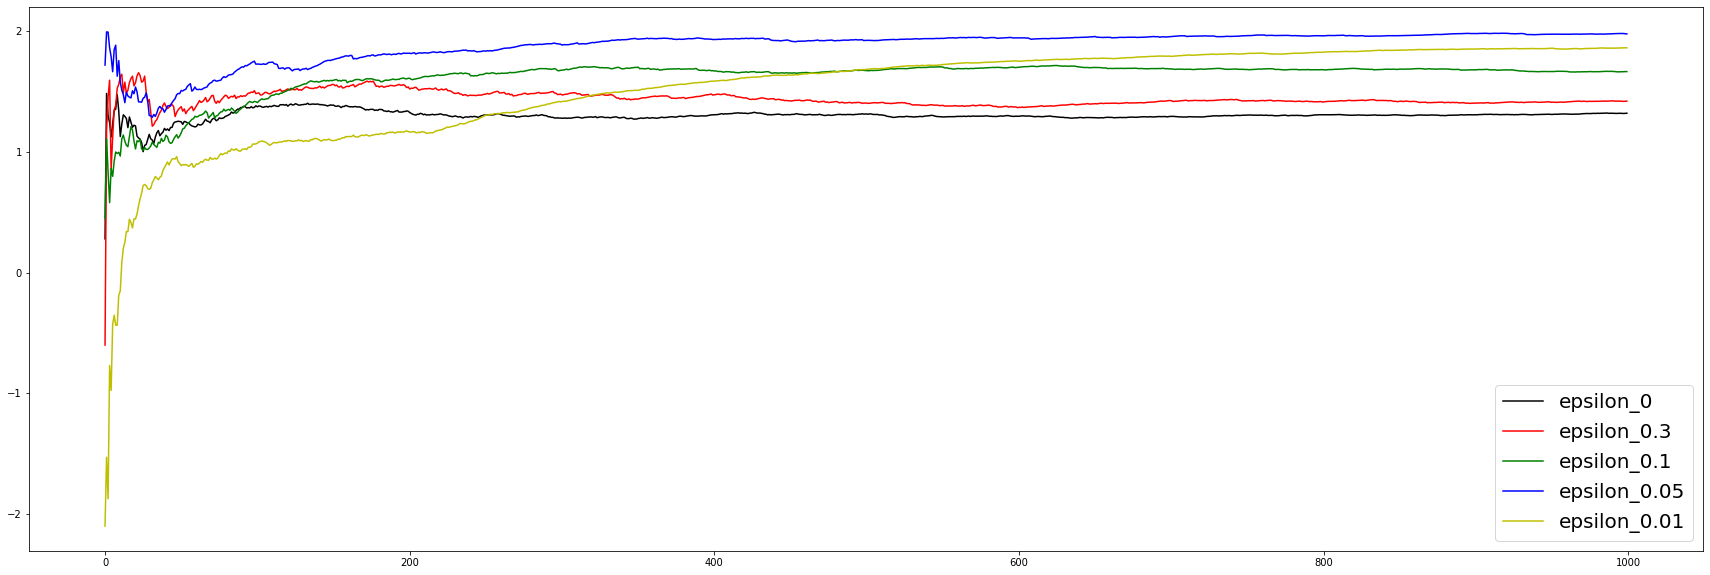

In [75]:
plt.figure(figsize=(30,10))
plt.plot(avg_reward_epsilon_0,'k',label = 'epsilon_0')
plt.plot(avg_reward_epsilon_0_3,'r',label = 'epsilon_0.3')
plt.plot(avg_reward_epsilon_0_1,'g',label = 'epsilon_0.1')
plt.plot(avg_reward_epsilon_0_05,'b',label = 'epsilon_0.05')
plt.plot(avg_reward_epsilon_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

# Non-Stationary

#### Sample Average 시간간격

In [182]:
q_star = [0.2 , -0.8 , 1.4 , 2.2 , 1.5 , -1.2 , -2.5 , -1 , 2.7 , -0.5]

In [166]:
def q_star_zitter(q_star,sigma=0.1):
    for i in range(10):
        q_star[i] += random.gauss(0,sigma)
        if q_star[i] >= 3:
            q_star[i] = 3
        elif q_star[i] <= -3:
            q_star[i] = -3
    return q_star

In [183]:
def calculate_Q(epsilon,epoch,alp=True,alpha_value=0.1,q_star = q_star):
    N_action = [0,0,0,0,0,0,0,0,0,0]
    Q_list = []
    Q = np.array(np.zeros(10))
    rn_list= []
    avg_reward_epsilon = []
    time = 0

    for i in range(epoch):
        time+=1
        
        action_selection = act_select(Q,epsilon)
        # print(action_selection)
        N_action[action_selection] +=1
        qn = Q[action_selection]
        q_star = q_star_zitter(q_star)
        rn = reward_return(action_selection,q_star)
        if alp == True:
            alpha = 1/N_action[action_selection]
        else:
            alpha = alpha_value
        rn_list.append(rn) 
        avg_reward_epsilon.append(sum(rn_list)/time)
        Q[action_selection] = Q_npus1(qn,rn,alpha)
        Q_list.append(Q)

    print("N_action : ",N_action)
    print("Q_Value  :",Q)
    print("q_star : ",q_star)
    
    return avg_reward_epsilon,N_action,Q

In [184]:
non_avg_reward_epsilon_0 , N_action_0 , Q_0 = calculate_Q(epsilon = 0,epoch = 1000, alp=True,q_star=q_star)

N_action :  [1, 1, 1, 992, 0, 0, 0, 0, 0, 5]
Q_Value  : [-2.26       -0.33       -0.11        1.31717742  0.          0.
  0.          0.          0.         -0.024     ]
q_star :  [0.1571888136724725, -0.8538939090521075, -0.463270068965292, 1.2740658001359828, -1.3430370329434724, 0.47495554348375435, -1.1696416294293228, 2.1279024367068966, 2.2510987944643053, -0.44396319805275486]


In [187]:
non_avg_reward_epsilon_0_3 , N_action_0_3 , Q_0_3 = calculate_Q(epsilon = 0.3,epoch = 1000,alp=True,q_star=q_star)

N_action :  [260, 37, 441, 27, 55, 29, 34, 41, 38, 38]
Q_Value  : [ 1.44534615e+00 -1.12432432e+00  1.83510204e+00 -1.46296296e+00
  1.39545455e+00 -3.00689655e-01  7.57352941e-01  7.31707317e-04
  4.90000000e-01 -2.50789474e-01]
q_star :  [1.1136533525510655, -2.777028147523062, 2.4890301784657, -1.957857809218699, 1.4717098839703813, 0.13358177474595045, 0.7697919772500514, -1.2147423583530896, -1.3952365073944961, -0.17082784931568928]


In [185]:
non_avg_reward_epsilon_0_1 , N_action_0_1 , Q_0_1 = calculate_Q(epsilon = 0.1,epoch = 1000,alp=True,q_star=q_star)

N_action :  [51, 12, 17, 6, 12, 18, 11, 8, 855, 10]
Q_Value  : [-0.08666667 -1.37916667 -0.93647059  0.94166667 -1.6575     -0.14
 -0.59181818  0.38375     1.06409357 -1.298     ]
q_star :  [-0.3041724328353788, -0.21862237512068938, -2.162844718264342, 0.394330336155462, -1.6518350100571342, -0.48849766595095223, -0.9975859265373435, 0.07803875247325756, -0.16581896069954766, -1.7725479171829566]


In [186]:
non_avg_reward_epsilon_0_05 , N_action_0_05 , Q_0_05 = calculate_Q(epsilon = 0.05,epoch = 1000,alp=True,q_star=q_star)

N_action :  [74, 8, 7, 78, 4, 3, 7, 9, 805, 5]
Q_Value  : [ 2.09513514 -0.18625     0.47285714  0.18538462  0.7525      0.10666667
 -0.04285714  0.67444444  1.43401242 -1.682     ]
q_star :  [2.1763764846402083, -0.13935736289236839, 2.6269662227695383, -0.5438561732774426, 2.778765887930065, 2.787251532358359, -2.3893732709971665, 0.8218905638289831, 0.43367174410211196, -2.983172532832631]


In [188]:
non_avg_reward_epsilon_0_01 , N_action_0_01 , Q_0_01 = calculate_Q(epsilon = 0.01,epoch = 1000, alp=True,q_star=q_star)

N_action :  [185, 1, 0, 0, 3, 276, 2, 2, 530, 1]
Q_Value  : [ 0.63362162 -0.73        0.          0.          1.55666667  1.60192029
  1.13       -0.67        1.80033962 -0.81      ]
q_star :  [-2.0889244770757713, -2.8654082289186635, 1.650386962880831, -0.6923402592294081, 0.05416362323980906, 0.26857375128491245, 1.648245386135837, -2.4718193809288245, 0.84870849479705, 1.9855386263720771]


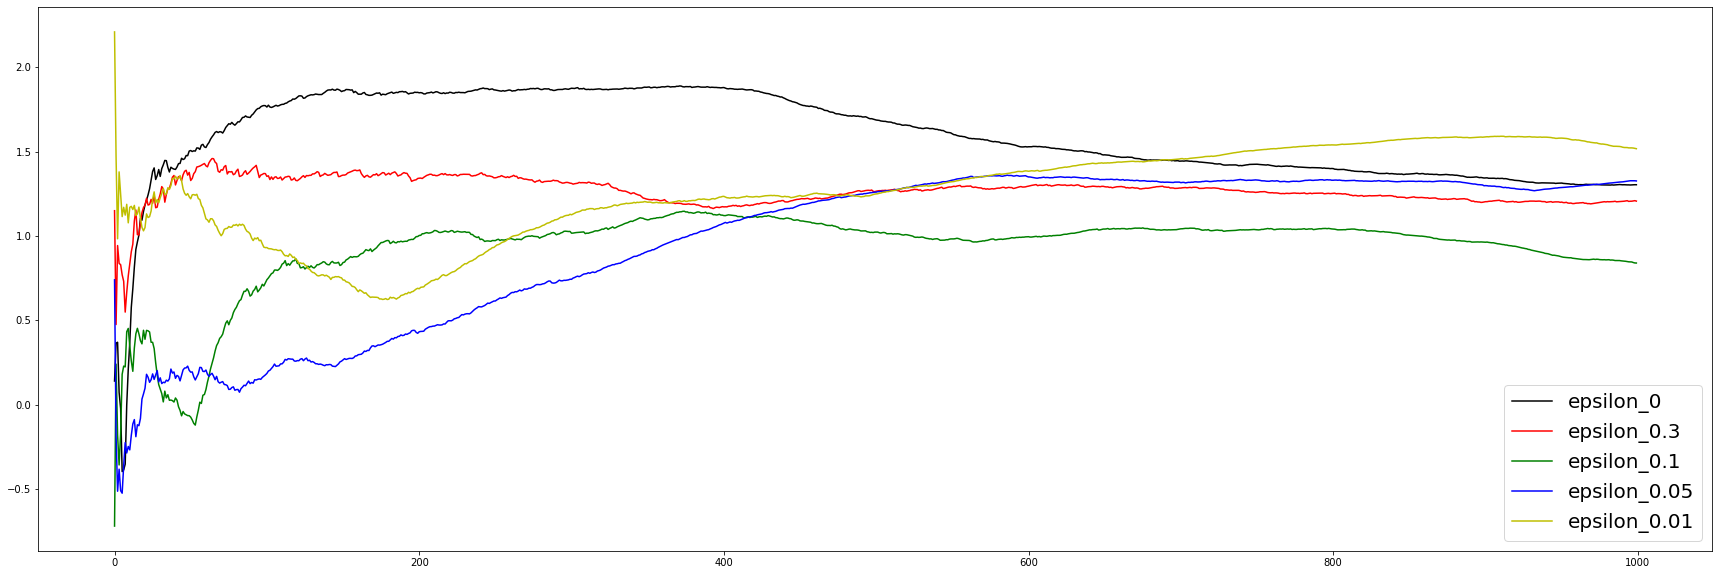

In [190]:
plt.figure(figsize=(30,10))
plt.plot(non_avg_reward_epsilon_0,'k',label = 'epsilon_0')
plt.plot(non_avg_reward_epsilon_0_3,'r',label = 'epsilon_0.3')
plt.plot(non_avg_reward_epsilon_0_1,'g',label = 'epsilon_0.1')
plt.plot(non_avg_reward_epsilon_0_05,'b',label = 'epsilon_0.05')
plt.plot(non_avg_reward_epsilon_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

#### 고정된 시간간격

In [191]:
fixed_avg_reward_epsilon_0 , N_action_0 , Q_0 = calculate_Q(epsilon = 0,epoch = 1000, alp=False, alpha_value=0.1,q_star=q_star)

N_action :  [1, 1, 146, 2, 804, 46, 0, 0, 0, 0]
Q_Value  : [-0.292      -0.264      -0.10387792 -0.1405     -0.03595565  2.08178733
  0.          0.          0.          0.        ]
q_star :  [-0.8257868351085988, 0.16923006741969923, -0.7162747519625262, 0.6984593605857963, 0.002495890856911216, 2.552027063434469, -0.479366651210369, 0.13611726718934034, 2.0273365000045773, 2.1231257912324275]


In [192]:
fixed_avg_reward_epsilon_0_3 , N_action_0_3 , Q_0_3 = calculate_Q(epsilon = 0.3,epoch = 1000,alp=False, alpha_value=0.1,q_star=q_star)

N_action :  [31, 83, 38, 40, 34, 207, 27, 240, 169, 131]
Q_Value  : [-0.0189333   1.0217113  -1.37068576  0.24643723  0.03986782  0.4190034
  0.86494221  0.90239124  1.69507239  0.76530301]
q_star :  [-0.6772644601150383, 1.7051624663946816, -0.44694552608403554, -0.7756533065214177, 0.629110313950765, 1.2897891992659083, 0.6425828967344087, -0.6754671968411693, 1.8621055062844216, 2.4121941442026724]


In [193]:
fixed_avg_reward_epsilon_0_1 , N_action_0_1 , Q_0_1 = calculate_Q(epsilon = 0.1,epoch = 1000,alp=False, alpha_value=0.1,q_star=q_star)

N_action :  [8, 228, 8, 8, 13, 109, 9, 11, 156, 450]
Q_Value  : [-0.58423097 -0.66595376  0.24280211 -0.26990397 -1.32134439  0.8224647
 -0.94755698  0.33709167  2.19897624  0.42594814]
q_star :  [-0.07096433416488318, -1.8976322027039545, 1.4671433499493396, -1.3474495695376745, -1.7059112967426762, 0.6526942044891865, -2.9123718159848204, 2.38528104579201, 2.6821539085683317, 0.5268163277664942]


In [194]:
fixed_avg_reward_epsilon_0_05 , N_action_0_05 , Q_0_05 = calculate_Q(epsilon = 0.05,epoch = 1000,alp=False, alpha_value=0.1,q_star=q_star)

N_action :  [150, 4, 408, 4, 2, 4, 4, 4, 418, 2]
Q_Value  : [ 1.54383867  0.568022    0.32671733  0.507608   -0.3425     -0.069395
 -0.401038    0.568905    0.22685028 -0.0235    ]
q_star :  [1.9745291254472277, 2.228010826967001, -0.2799547858628161, 2.2694322123011186, -0.9469713352578732, -1.8915864218761973, -0.8784610287952892, 2.2489137726721014, -0.8839734483415298, 0.23446890973677328]


In [195]:
fixed_avg_reward_epsilon_0_01 , N_action_0_01 , Q_0_01 = calculate_Q(epsilon = 0.01,epoch = 1000,alp=False, alpha_value=0.1,q_star=q_star)

N_action :  [823, 0, 2, 0, 4, 2, 1, 165, 1, 2]
Q_Value  : [ 0.62240976  0.          0.065       0.         -0.527889   -0.3975
  0.084       0.14286304  0.205      -0.2318    ]
q_star :  [0.46282069580679974, 1.9105203524302212, 1.669190029183733, 0.11703433248829112, -0.8994299089137422, -1.3778203624260814, -0.29130649082778454, -0.13482483981793786, 2.989213956695119, -0.5400804188079771]


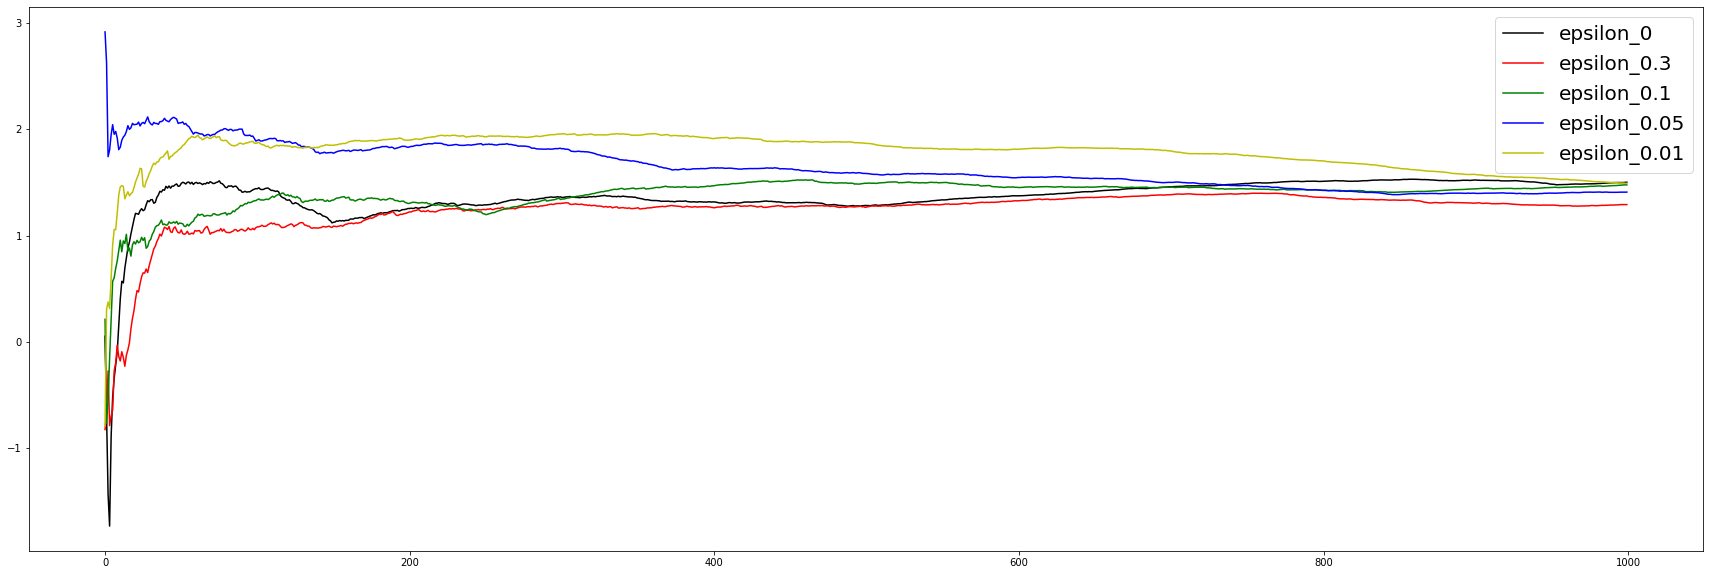

In [196]:
plt.figure(figsize=(30,10))
plt.plot(fixed_avg_reward_epsilon_0,'k',label = 'epsilon_0')
plt.plot(fixed_avg_reward_epsilon_0_3,'r',label = 'epsilon_0.3')
plt.plot(fixed_avg_reward_epsilon_0_1,'g',label = 'epsilon_0.1')
plt.plot(fixed_avg_reward_epsilon_0_05,'b',label = 'epsilon_0.05')
plt.plot(fixed_avg_reward_epsilon_0_01,'y',label = 'epsilon_0.01')
plt.legend(fontsize=20)
plt.show()

# Other Ref

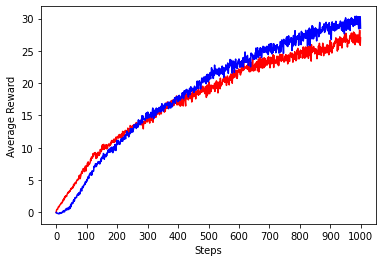

[[  8 -31  26 ... -32  37 -12]
 [ -2 -16  -7 ... -34 -16 -10]
 [-50 -15   7 ...   5  15   9]
 ...
 [ -9  -6 -16 ...  -8  11  -2]
 [  3  31 -59 ... -28  39  19]
 [-16   3  -1 ... -10 -31  57]]
[[  0  -8   7 ... -10  36   6]
 [ -1  -5  -7 ... -15  -8  -2]
 [-16  -5   1 ...   2  11   8]
 ...
 [ -6   1  -3 ...  -1   2  -1]
 [  0   3 -26 ...  -1  32   8]
 [ -1   0   2 ...   0  -4  50]]
[[  0 -22   6 ...  -3   7   1]
 [  0   0 -13 ... -24  -7   0]
 [-25   0   3 ...   5  10   2]
 ...
 [  0   0  -5 ...  -1   3  -2]
 [  0   9   7 ...  -5  11  12]
 [  0   0   0 ...   0  -6   8]]


In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
def RandomWalk(x):
    #x is a vector, each element takes random walk independently, this function return a new vector where each element takes a step by the rule of  random walk
    dim=np.size(x)
    walk_set=[-1,1,0]
    for i in range(dim):
        x[i]=x[i]+np.random.choice(walk_set)
    return x

def eps_greedy(epsilon, Q):
    # This function return an action chosen by epsilon greedy algorithm given the current action value estimate is Q
    i=np.argmax(Q)
    dim=np.size(Q)
    action_space=range(0,dim,1)
    sample=np.random.uniform(0,1)
    if sample<=1-epsilon:
        return i
    else:
       np.delete(action_space,i)
       return np.random.choice(action_space)

def multi_task(max_iter,task_number,epsilon,arm_number,step_size):
    rows, cols = task_number,arm_number
    my_matrix =np.array( [([0]*cols) for i in range(rows)] )
    constQ=np.array( [([0]*cols) for i in range(rows)] )
    variaQ=np.array( [([0]*cols) for i in range(rows)] )
    q=np.array( [([0]*cols) for i in range(rows)] )
    constN=np.array( [([0]*cols) for i in range(rows)] )
    variaN=np.array( [([0]*cols) for i in range(rows)] )
    constR=np.zeros(max_iter)
    variaR=np.zeros(max_iter)
    for i in range(max_iter):
        for j in range(task_number):
            #random walk of each arm
            task_q=q[j,:]
            task_q=RandomWalk(task_q)
            q[j,:]=task_q
            #constant stepsize
            
            task_constQ=constQ[j,:]
            task_constN=constN[j,:]
            action_const=eps_greedy(epsilon,task_constQ)
            
            RewardConst=task_q[action_const]
            constR[i]=constR[i]+RewardConst
            task_constN[action_const]=task_constN[action_const]+1
            alpha=step_size
            difference=RewardConst-task_constQ[action_const]
            task_constQ[action_const]=task_constQ[action_const]+alpha*difference
            constQ[j,:]=task_constQ
            constN[j,:]=task_constN
            #Changing stepsize
            task_variaQ=variaQ[j,:]
            task_variaN=variaN[j,:]
            action_varia=eps_greedy(epsilon,task_variaQ)
            reward_varia=task_q[action_varia]
            task_variaN[action_varia]=task_variaN[action_varia]+1
            if i==0:
                beta=1
            else:
                beta=1/task_variaN[action_varia]
            task_variaQ[action_varia]=task_variaQ[action_varia]+beta*(reward_varia-task_variaQ[action_varia])
            
            variaN[j,:]=task_variaN
            variaQ[j,:]=task_variaQ
            variaR[i]=variaR[i]+reward_varia
        variaR[i]=variaR[i]/task_number
        constR[i]=constR[i]/task_number
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.plot(variaR,color='r')
    plt.plot(constR,color='b')
    plt.xticks(np.arange(0,max_iter+1,100))
    #plt.xticks(np.arange(len(constR)), np.arange(100, len(constR)+1) )
    # plt.grid()
    plt.show()
    plt.close()
    print(q)
    print(constQ)
    print(variaQ)

max_iter=1000
task_number=500
epsilon=0.1
arm_number=10
step_size=0.1
multi_task(max_iter,task_number,epsilon,arm_number,step_size)